In [1]:
from susie import susie
from susie_plots import susie_plot
from univariate_regression import univariate_regression
import numpy as np
import pandas as pd
from susie_utils import susie_get_cs, susie_get_pip

In [2]:
base_path = "/home/jwudt/final_project/datasets/"
x_file = f"{base_path}N2finemapping_X.csv"
y_file = f"{base_path}N2finemapping_Y.csv"
true_coef_file = f"{base_path}N2finemapping_true_coef.csv"

# 读取数据
X = pd.read_csv(x_file).values
Y = pd.read_csv(y_file).values
true_coef = pd.read_csv(true_coef_file).values
y = Y[:, 0]
b = true_coef[:, 0]
print(np.where(b != 0)[0])
# 打印数据形状以确认读取正确
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"true_coef shape: {true_coef.shape}")
print(X[:5])
X_1 = pd.read_csv(f"{base_path}N3finemapping_X.csv").values
print(X_1.shape)
print(X_1[:5])


[336 998]
X shape: (574, 1002)
Y shape: (574, 2)
true_coef shape: (1002, 2)
[[ 0.70333129 -0.04181185  0.72648084 ... -0.59059233 -0.5898378
  -0.59059233]
 [ 0.70333129 -0.04181185 -0.27351916 ... -0.59059233 -0.5898378
  -0.59059233]
 [-0.29666871 -0.04181185 -0.27351916 ... -0.59059233 -0.5898378
  -0.59059233]
 [-0.29666871 -0.04181185 -0.27351916 ... -0.59059233 -0.5898378
  -0.59059233]
 [ 0.70333129  0.95818815 -0.27351916 ...  1.40940767  1.4101622
   1.40940767]]
(574, 1001)
[[-0.02090592  0.4738676   0.16202091 ... -0.02090592 -0.28445488
  -0.38833076]
 [-0.02090592 -0.5261324   1.16202091 ... -0.02090592 -0.28445488
  -0.38833076]
 [-0.02090592 -0.5261324   1.16202091 ... -0.02090592 -0.28445488
  -0.38833076]
 [-0.02090592  0.4738676   0.16202091 ... -0.02090592 -0.28445488
  -0.38833076]
 [-0.02090592 -0.5261324   1.16202091 ... -0.02090592 -0.28445488
  -0.38833076]]


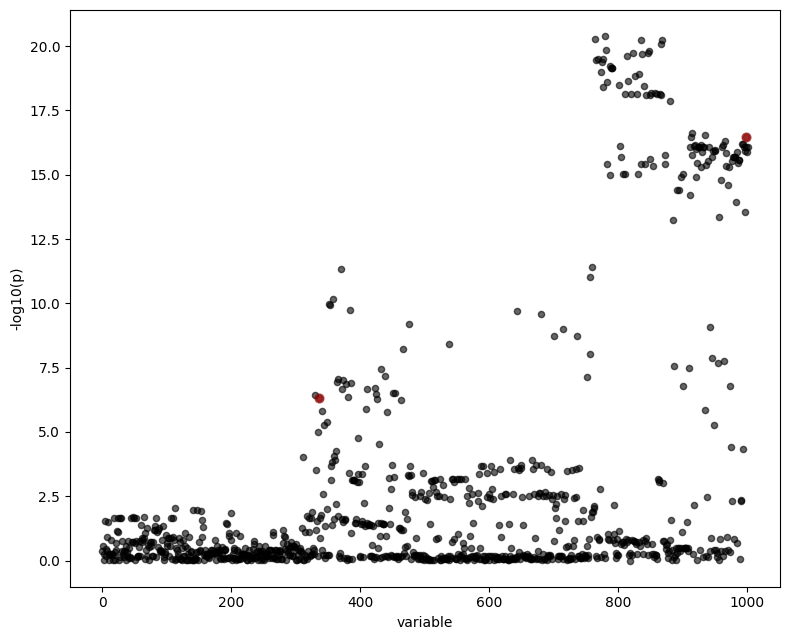

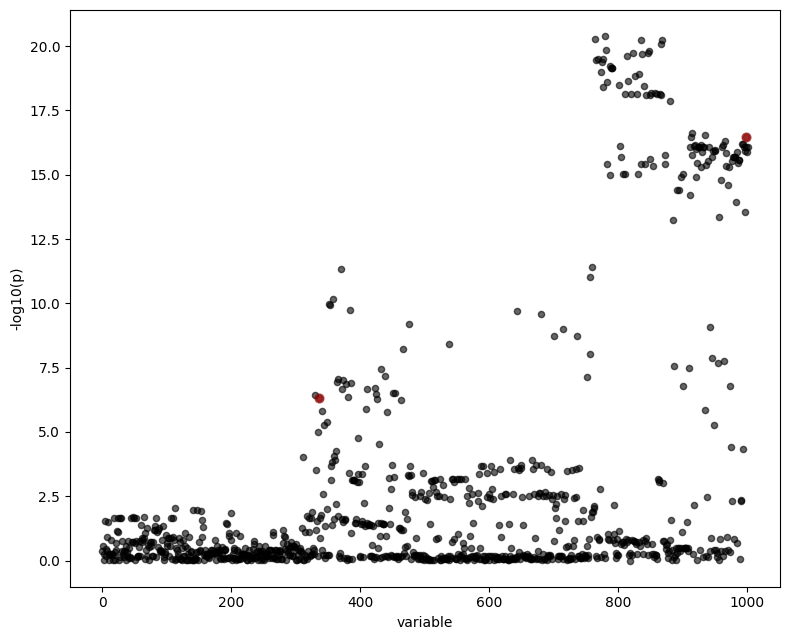

In [3]:
sumstats = univariate_regression(X, y)
z_scores = sumstats['betahat'] / sumstats['sebetahat']
susie_plot(z_scores, y = "z", b=b)

In [4]:
fitted = susie(X=X, y=y, L=10, verbose=True)


objective: -881.5482599454225
objective: -877.7281357344882
objective: -862.5079996764981
objective: -862.4752089478872
objective: -859.7844197503721
objective: -859.755498915384
objective: -856.7080702340794
objective: -856.6782445785145
objective: -853.8752604626933
objective: -853.8567799407137
objective: -851.4754881882335
objective: -851.4675261261286
objective: -849.5609324024477
objective: -849.5587113853954
objective: -848.3263521438087
objective: -848.3254787756368
objective: -846.4939652190203
objective: -846.4921525036866
objective: -845.7000381412389
objective: -845.6999753393746
objective: -845.4987537970694
objective: -845.4987355927864
objective: -845.4097457422768
objective: -845.4097370655029
objective: -845.3576320467877
objective: -845.3576272905046
objective: -845.3222971855357
objective: -845.3222941751926
objective: -845.2962685350611
objective: -845.2962664734384
objective: -845.2760603794525
objective: -845.276058890262
objective: -845.2597907693736
objective: -

In [5]:
print(fitted.sets)

{'cs': {'L1': array([ 849,  912,  913,  914,  915,  919,  923,  924,  925,  926,  929,
        930,  932,  933,  934,  941,  945,  947,  950,  951,  961,  966,
        967,  978,  979,  981,  982,  984,  987,  988,  992,  993,  995,
        998,  999, 1000, 1001]), 'L2': array([336, 378, 439])}, 'purity':    min.abs.corr  mean.abs.corr  median.abs.corr
1      0.972239       0.993806         0.994718
2      0.853498       0.877599         0.884838, 'cs_index': array([1, 2]), 'coverage': array([0.95456098, 0.96975527]), 'requested_coverage': 0.95}


In [6]:
sets = susie_get_cs(fitted, X=X, coverage=0.9, min_abs_corr=0.1)
print(sets)

{'cs': {'L2': array([336]), 'L1': array([ 912,  913,  914,  915,  919,  924,  925,  926,  929,  930,  932,
        933,  934,  941,  947,  950,  951,  961,  966,  967,  978,  979,
        984,  992,  993,  995,  998,  999, 1000, 1001])}, 'purity':    min.abs.corr  mean.abs.corr  median.abs.corr
2      1.000000       1.000000         1.000000
1      0.982231       0.995118         0.995795, 'cs_index': array([2, 1]), 'coverage': array([0.91319911, 0.90059754]), 'requested_coverage': 0.9}


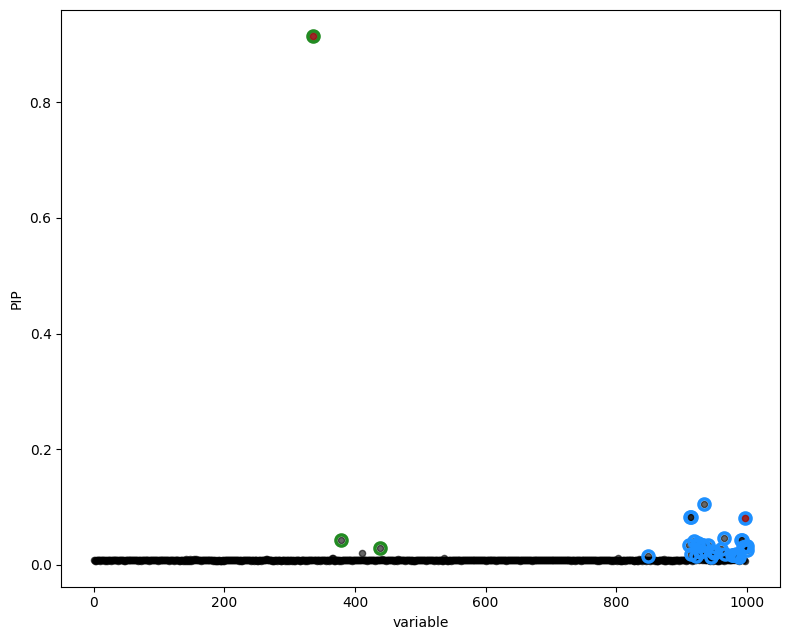

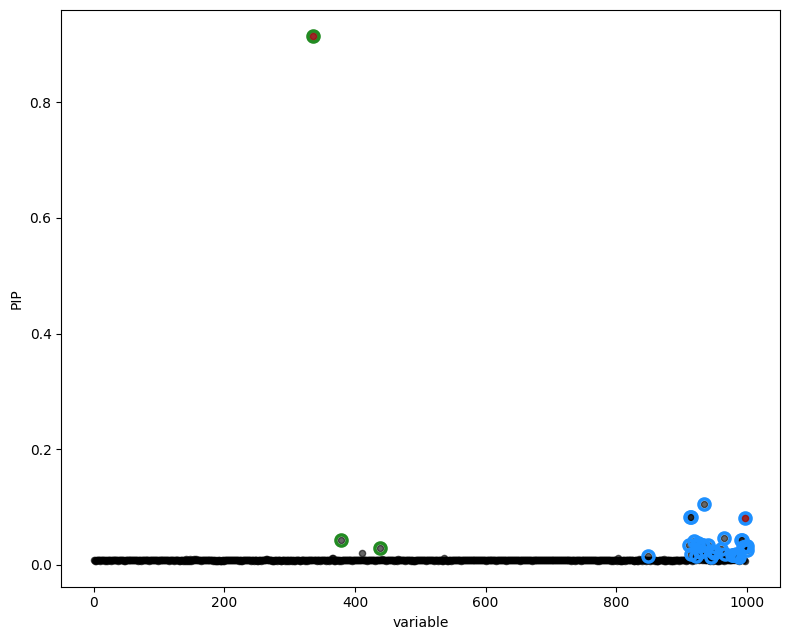

In [7]:
from susie_plots import susie_plot
susie_plot(fitted, y = "PIP", b=b)

In [8]:
import os
import numpy as np
import pandas as pd
from pathlib import Path

# 读取N2数据
X = pd.read_csv('/home/jwudt/final_project/datasets/N2finemapping_X.csv')
Y = pd.read_csv('/home/jwudt/final_project/datasets/N2finemapping_Y.csv')
y = Y.iloc[:, 0]

# 计算z-scores
sumstats = univariate_regression(X, y)
z_scores = sumstats['betahat'] / sumstats['sebetahat']

# 设置输出目录
output_dir = "/home/jwudt/final_project/dapg/"
os.makedirs(output_dir, exist_ok=True)

# 保存z-scores
z_file = f"{output_dir}/zscore.txt"
with open(z_file, 'w') as f:
    for i, z in enumerate(z_scores):
        f.write(f"SNP{i+1}\t{z}\n")

# 计算并保存LD矩阵
X_scaled = (X - X.mean()) / X.std()
R = np.corrcoef(X_scaled.T)
R_file = f"{output_dir}/ld_matrix.txt"
np.savetxt(R_file, R)

# 运行DAP-G（使用静态编译的可执行文件）
dap_cmd = f"/home/jwudt/dap/dap_src/dap-g.static -d_z {z_file} -d_ld {R_file} -t 20 -o {output_dir}/dap.out"
os.system(dap_cmd)
print("DAP-G analysis completed.")

DAP-G analysis completed.



============ DAP Configuration ============

INPUT

	* summary-level data (z-scores and LD matrix)
	* number of candidate SNPs: 1002

PROGRAM OPTIONS

	* maximum model size allowed [-msize]: 1002 (no restriction)
	* LD control threshold [-ld_control]: 0.25
	* normalizing constant convergence threshold [-converg_thresh]: 1.00e-02 (log10 scale)

RUN LOG


	Model_Size 	candidates 	  log10(NC)
	    1 	 	   27 	 	    14.925
	    2 	 	   99 	 	    16.422
	    2 	 	  115 	 	    21.186	*
	    3 	 	  132 	 	    21.211
	    4 	 	  133 	 	    21.211


In [9]:
def read_dap_pip(output_file):
    """读取DAP-G输出文件中的PIP值,返回以SNP序号-1为索引的Series"""
    pips = {}
    with open(output_file, 'r') as f:
        lines = f.readlines()
        # 找到"Posterior inclusion probability"后的内容
        start_line = None
        for i, line in enumerate(lines):
            if "Posterior inclusion probability" in line:
                start_line = i + 2
                break
        
        if start_line is None:
            raise ValueError("找不到PIP部分")
            
        # 读取PIP值
        for line in lines[start_line:]:
            if not line.strip():
                break
            parts = line.strip().split()
            snp_id = parts[1]  # 例如 "SNP337"
            pip = float(parts[2])
            # 提取数字并减1作为索引
            index = int(snp_id[3:]) - 1
            pips[index] = pip
    
    # 转换为pandas Series，并按索引排序
    pip_dap = pd.Series(pips)
    return pip_dap.sort_index()  # 按索引从小到大排序

# 读取PIP值
output_file = "/home/jwudt/final_project/dapg/output/K3/dap.out"
pip_dap = read_dap_pip(output_file)

# 打印前10个值
print("First 10 PIPs (index = SNP number - 1):")
print(pip_dap.head(10))
print(pip_dap[336])

First 10 PIPs (index = SNP number - 1):
0    0.000032
1    0.000032
2    0.000032
3    0.000032
4    0.000032
5    0.000032
6    0.000032
7    0.000032
8    0.000032
9    0.000032
dtype: float64
0.730696


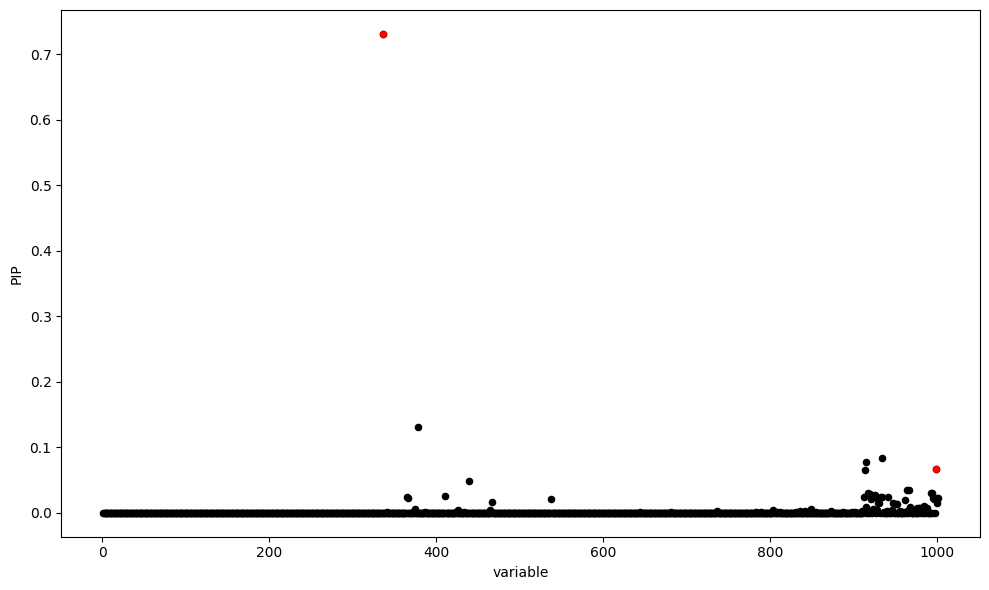

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
susie_plot(pip_dap, y = "PIP", b=b)

In [11]:
pip_susie = susie_get_pip(fitted)
# 排序并输出最大的10个PIP值
sorted_pip = pd.Series(pip_susie)
print("前10个最大的PIP值:")
print(sorted_pip)
print(sorted_pip[336])


前10个最大的PIP值:
0       0.007893
1       0.007689
2       0.007768
3       0.007688
4       0.008374
          ...   
997     0.007692
998     0.081954
999     0.032170
1000    0.025483
1001    0.032170
Length: 1002, dtype: float64
0.9138681243297689


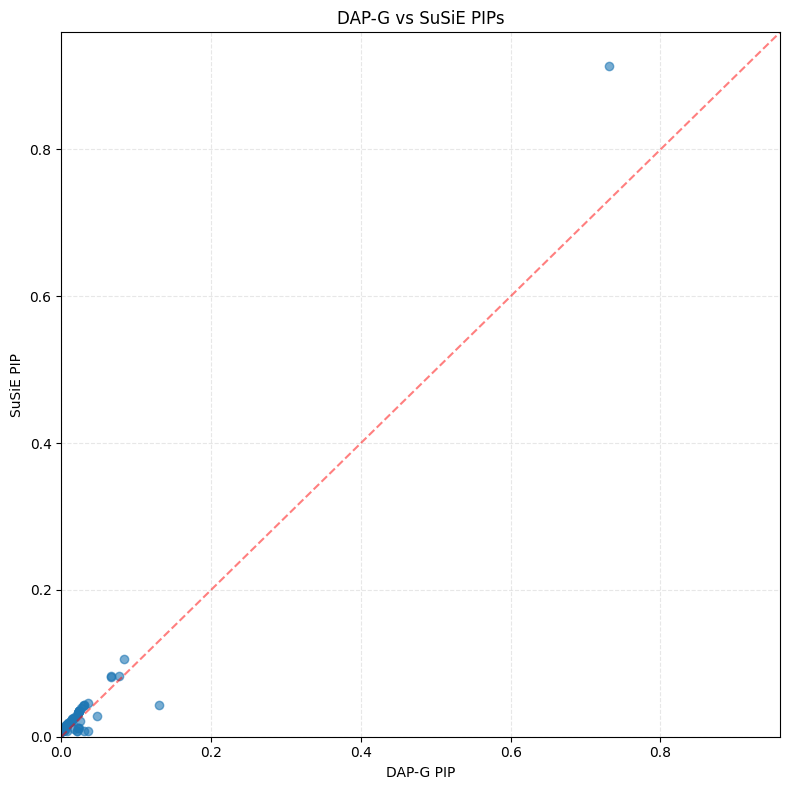

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))  # 使用正方形的图形

# 计算最大值，给一点余量
max_pip = max(pip_dap.max(), pip_susie.max()) * 1.05  # 增加5%的余量

plt.scatter(pip_dap, pip_susie, alpha=0.6)
plt.xlabel('DAP-G PIP')
plt.ylabel('SuSiE PIP')
plt.title('DAP-G vs SuSiE PIPs')

# 添加对角线
plt.plot([0, max_pip], [0, max_pip], 'r--', alpha=0.5)

# 设置坐标轴范围
plt.xlim(0, max_pip)
plt.ylim(0, max_pip)

plt.grid(True, linestyle='--', alpha=0.3)  # 添加网格线
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import os
from susie import susie
from univariate_regression import univariate_regression
from susie_utils import susie_get_pip

# 读取数据
X = pd.read_csv('/home/jwudt/final_project/datasets/N2finemapping_X.csv')
X = X.values
R_file = "/home/jwudt/final_project/datasets/ld_matrix.txt"

# 设置参数
nrep = 1
effect_size = 0.1
noise_var_values = [0.9]
n, p = X.shape
thresholds = np.arange(0.1, 1, 0.01)
K_value = [1]

np.random.seed(42)

def calculate_power_precision(pip_values, idx_causal, threshold):
    """
    Args:
        pip_values: PIP值数组
        idx_causal: 真实效应位置
        threshold: PIP阈值
    Returns:
        power: 真实效应位置被选中的比例
        precision: 选中位置是真实效应的比例
    """
    # 获取PIP值大于阈值的位置
    selected = np.where(pip_values > threshold)[0]
    
    # precision: 选中位置中是真实效应的比例
    precision = np.mean([idx in idx_causal for idx in selected]) if len(selected) > 0 else 0
    
    # power: 真实效应被选中的比例
    power = np.mean([idx in selected for idx in idx_causal]) if len(idx_causal) > 0 else 0
    
    # FDR = 1 - precision
    fdr = 1 - precision
    
    return power, fdr

# 创建一个DataFrame来存储结果
columns = ['rep', 'K', 'threshold', 'method', 'power', 'fdr']
results = pd.DataFrame(columns=columns)

plt.figure(figsize=(10, 10))
# 开始模拟
for rep in range(nrep):
    print(f"Replication {rep+1}/{nrep}")
    for noise_var in noise_var_values:
        
        for K in K_value:
            # 随机选择K个效应位置
            idx_causal = np.random.choice(p, size=K, replace=False)
            beta = np.zeros(p)
            beta[idx_causal] = effect_size
            noise = np.random.normal(0, np.sqrt(noise_var), n)
            y = X @ beta + noise
            
            # 运行SuSiE
            fitted = susie(X=X, y=y, L=10, verbose=False, scaled_prior_variance=0.1, 
                        is_estimate_prior_variance=False, is_estimate_residual_variance=True)
            pip_susie = susie_get_pip(fitted)
            
            # 运行DAP-G
            output_dir = f"/home/jwudt/final_project/dapg/output/sim_K{K}_rep{rep}"
            os.makedirs(output_dir, exist_ok=True)
            
            sumstats = univariate_regression(X, y)
            z_scores = sumstats['betahat'] / sumstats['sebetahat']
            z_file = f"{output_dir}/zscore.txt"
            with open(z_file, 'w') as f:
                for i, z in enumerate(z_scores):
                    f.write(f"SNP{i+1}\t{z}\n")
            
            dap_cmd = f"/home/jwudt/dap/dap_src/dap-g.static -d_z {z_file} -d_ld {R_file} -t 10 -o {output_dir}/dap.out > /dev/null 2>&1"
            os.system(dap_cmd)
            pip_dap = read_dap_pip(f"{output_dir}/dap.out")
            # 绘制当前循环的PIP散点图
            # 绘制真实效应点
            plt.scatter(pip_dap[idx_causal], pip_susie[idx_causal], color='darkred', alpha=0.6)
            # 绘制其他点
            plt.scatter(pip_dap[~np.isin(np.arange(p), idx_causal)], pip_susie[~np.isin(np.arange(p), idx_causal)], color='lightgray', alpha=0.6)
            # 计算每个阈值下的指标并添加到DataFrame
            for threshold in thresholds:
                # SuSiE结果
                power, fdr = calculate_power_precision(pip_susie, idx_causal, threshold)
                results = pd.concat([results, pd.DataFrame({
                    'K': [K],
                    'threshold': [threshold],
                    'method': ['susie'],
                    'power': [power],
                    'fdr': [fdr]
                })], ignore_index=True)
                
                # DAP-G结果
                power, fdr = calculate_power_precision(pip_dap, idx_causal, threshold)
                results = pd.concat([results, pd.DataFrame({
                    'K': [K],
                    'threshold': [threshold],
                    'method': ['dap'],
                    'power': [power],
                    'fdr': [fdr]
                })], ignore_index=True)

# 计算平均结果
mean_results = results.groupby(['K', 'threshold', 'method'])[['power', 'fdr']].mean().reset_index()
# 计算最大值，给一点余量
max_pip = max(pip_dap.max(), pip_susie.max()) * 1.05  # 增加5%的余量

plt.xlabel('DAP-G PIP')
plt.ylabel('SuSiE PIP')
plt.title('DAP-G vs SuSiE PIPs')

# 添加对角线
plt.plot([0, max_pip], [0, max_pip], 'r--', alpha=0.5)

# 设置坐标轴范围
plt.xlim(0, max_pip)
plt.ylim(0, max_pip)

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
import numpy as np

# 读取loci文件
loci = pd.read_csv("/home/share/mingxuan/fine_mapping/loci_chr22_1mb.txt", sep="\t")
# 设置参数
i_loci = 29
idx_include = np.arange(501, 1001) + loci.loc[i_loci-1, 'idx_start'] - 1  
p = len(idx_include)
print(p)
print(idx_include)

500
[2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036
 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050
 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064
 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077 2078
 2079 2080 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091 2092
 2093 2094 2095 2096 2097 2098 2099 2100 2101 2102 2103 2104 2105 2106
 2107 2108 2109 2110 2111 2112 2113 2114 2115 2116 2117 2118 2119 2120
 2121 2122 2123 2124 2125 2126 2127 2128 2129 2130 2131 2132 2133 2134
 2135 2136 2137 2138 2139 2140 2141 2142 2143 2144 2145 2146 2147 2148
 2149 2150 2151 2152 2153 2154 2155 2156 2157 2158 2159 2160 2161 2162
 2163 2164 2165 2166 2167 2168 2169 2170 2171 2172 2173 2174 2175 2176
 2177 2178 2179 2180 2181 2182 2183 2184 2185 2186 2187 2188 2189 2190
 2191 2192 2193 2194 2195 2196 2197 2198 2199 2200 2201 2202 2203 2204
 2205 2206 2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218
 2

In [3]:
# pop1 small nobg
import os
import pandas as pd
import numpy as np
from susie import susie
from susie_plots import susie_plot
import matplotlib.pyplot as plt

# 设置参数
n1 = 5000
K_true = 1
K = 5
h1_omega = 0.005
h2_omega = 0.005
rho_omega = 0.8
enrich = 50
enrich2 = enrich * 10
rho_sigma = 0
nrep = 50
i_loci = 29
pc_var = 0.1

# 读取loci文件
loci = pd.read_csv("/home/share/mingxuan/fine_mapping/loci_chr22_1mb.txt", sep="\t")
idx_include = np.arange(499, 999) + loci.loc[i_loci-1, 'idx_start']
p = len(idx_include)

# 初始化结果列表
out_susie1 = []
results_dir = f"/home/jwudt/final_project/results/susiepy/small_nobg/Ktrue{K_true}/pop1"
os.makedirs(results_dir, exist_ok=True)

# 循环进行nrep次模拟
for i in range(1, nrep+1):
    # 构建文件路径
    X1_file_path = f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_X1_wg_in_sample_ref_n{n1}_chr22_loci{i_loci}.txt"
    y1_file_path = (f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_y1_nobg_loci_{i_loci}_small_p{p}_"
                     f"chr22_n{n1}_loci{i_loci}__Ktrue{K_true}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                     f"enrich{enrich2}_rhoSigma{rho_sigma}_nrep{nrep}_{i}.txt")
    Beta1_file_path = (f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_loci_{i_loci}_small_p{p}_"
                    f"Beta1_Ktrue{K_true}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                    f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}.txt")

    # 读取并筛选数据
    X1 = pd.read_csv(X1_file_path, sep="\t")
    X1 = X1.iloc[:, idx_include]  # 只保留idx_include对应的列
    
    y1 = pd.read_csv(y1_file_path, sep="\t", header=None)
    y1 = np.array(y1.iloc[:, 1])
    
    Beta1 = pd.read_table(Beta1_file_path, sep='\t').values
    Beta1 = Beta1[idx_include - idx_include[0]]  # 调整索引以匹配筛选后的数据
    
    X1 = np.array(X1)
    if X1.dtype != np.float64:
        X1 = X1.astype(np.float64)
        
    # 运行susie
    fitted = susie(X=X1, y=y1, L=K, verbose=False, coverage=0.9, min_abs_corr=0.1)
    # 绘图并保存
    fig = susie_plot(fitted, y="PIP", b=Beta1[:, i-1])
    fig.savefig(f"{results_dir}/rep{i}.png")
    # plt.show(fig)
    plt.close(fig)
    
    # 保存结果
    out_susie1.append(fitted)
    print(f"{i}-th rep finished.")

# 保存所有结果
output_file_path = (f"{results_dir}/susie_results_"
                   f"n{n1}_K{K}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                   f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}.pkl")
pd.to_pickle(out_susie1, output_file_path)

1-th rep finished.
2-th rep finished.
3-th rep finished.
4-th rep finished.
5-th rep finished.
6-th rep finished.
7-th rep finished.
8-th rep finished.
9-th rep finished.
10-th rep finished.
11-th rep finished.
12-th rep finished.
13-th rep finished.
14-th rep finished.
15-th rep finished.
16-th rep finished.
17-th rep finished.
18-th rep finished.
19-th rep finished.
20-th rep finished.
21-th rep finished.
22-th rep finished.
23-th rep finished.
24-th rep finished.
25-th rep finished.
26-th rep finished.
27-th rep finished.
28-th rep finished.
29-th rep finished.
30-th rep finished.
31-th rep finished.
32-th rep finished.
33-th rep finished.
34-th rep finished.
35-th rep finished.
36-th rep finished.
37-th rep finished.
38-th rep finished.
39-th rep finished.
40-th rep finished.
41-th rep finished.
42-th rep finished.
43-th rep finished.
44-th rep finished.
45-th rep finished.
46-th rep finished.
47-th rep finished.
48-th rep finished.
49-th rep finished.
50-th rep finished.


In [8]:
# pop1 small
import os
import pandas as pd
import numpy as np
from susie import susie
from susie_plots import susie_plot
import matplotlib.pyplot as plt
# 设置参数
n1 = 5000
K_true = 2
K = 5
h1_omega = 0.005
h2_omega = 0.005
rho_omega = 0.8
enrich = 50
rho_sigma = 0
nrep = 50
i_loci = 29
pc_var = 0.1
# 读取loci文件
loci = pd.read_csv("/home/share/mingxuan/fine_mapping/loci_chr22_1mb.txt", sep="\t")
idx_include = np.arange(499, 999) + loci.loc[i_loci-1, 'idx_start']
p = len(idx_include)

# 初始化结果列表
out_susie1 = []
results_dir = f"/home/jwudt/final_project/results/susiepy/small/Ktrue{K_true}/pop1"
os.makedirs(results_dir, exist_ok=True)
# 循环进行nrep次模拟
for i in range(1, nrep+1):
    # 构建文件路径
    X1_file_path = f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_X1_wg_in_sample_ref_n{n1}_chr22_loci{i_loci}.txt"
    y1_file_path = (f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_y1_loci_{i_loci}_small_p{p}_"
                     f"chr22_n{n1}_loci{i_loci}__Ktrue{K_true}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                     f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}_{i}.txt")  # 使用当前的i值
    Beta1_file_path = (f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_loci_{i_loci}_small_p{p}_"
                    f"Beta1_Ktrue{K_true}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                    f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}.txt")
    # 读取并筛选数据
    X1 = pd.read_csv(X1_file_path, sep="\t")
    X1 = X1.iloc[:, idx_include]  # 只保留idx_include对应的列
    
    y1 = pd.read_csv(y1_file_path, sep="\t", header=None)
    y1 = np.array(y1.iloc[:, 1])
    
    Beta1 = pd.read_table(Beta1_file_path, sep='\t').fillna(0).values
    Beta1 = Beta1[idx_include - idx_include[0]]  # 调整索引以匹配筛选后的数据
    
    X1 = np.array(X1)
    if X1.dtype != np.float64:
        X1 = X1.astype(np.float64)
    # 运行自定义的suise函数
    fitted = susie(X=X1, y=y1, L=K, verbose=False, coverage=0.9, min_abs_corr=0.1)
    fig = susie_plot(fitted, y = "PIP", b=Beta1[:, i-1])
    fig.savefig(f"{results_dir}/rep{i}.png")
    # plt.show(fig)
    plt.close(fig)
    # 保存结果
    out_susie1.append(fitted)

    print(f"{i}-th rep finished.")

output_file_path = (f"{results_dir}/susie_results_"
                   f"n{n1}_K{K}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                   f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}.pkl")
pd.to_pickle(out_susie1, output_file_path)

1-th rep finished.
2-th rep finished.
3-th rep finished.
4-th rep finished.
5-th rep finished.
6-th rep finished.
7-th rep finished.
8-th rep finished.
9-th rep finished.
10-th rep finished.
11-th rep finished.
12-th rep finished.
13-th rep finished.
14-th rep finished.
15-th rep finished.
16-th rep finished.
17-th rep finished.
18-th rep finished.
19-th rep finished.
20-th rep finished.
21-th rep finished.
22-th rep finished.
23-th rep finished.
24-th rep finished.
25-th rep finished.
26-th rep finished.
27-th rep finished.
28-th rep finished.
29-th rep finished.
30-th rep finished.
31-th rep finished.
32-th rep finished.
33-th rep finished.
34-th rep finished.
35-th rep finished.
36-th rep finished.
37-th rep finished.
38-th rep finished.
39-th rep finished.
40-th rep finished.
41-th rep finished.
42-th rep finished.
43-th rep finished.
44-th rep finished.
45-th rep finished.
46-th rep finished.
47-th rep finished.
48-th rep finished.
49-th rep finished.
50-th rep finished.


In [10]:
# pop1 small inflated

import pandas as pd
import numpy as np
from susie import susie
from susie_plots import susie_plot
import matplotlib.pyplot as plt
# 设置参数
n1 = 5000
K_true = 1
K = 5
h1_omega = 0.005
h2_omega = 0.005
rho_omega = 0.8
enrich = 50
rho_sigma = 0
nrep = 50
i_loci = 29
pc_var = 0.1
# 读取loci文件
loci = pd.read_csv("/home/share/mingxuan/fine_mapping/loci_chr22_1mb.txt", sep="\t")
idx_include = np.arange(499, 999) + loci.loc[i_loci-1, 'idx_start']
p = len(idx_include)

# 初始化结果列表
out_susie1 = []
results_dir = f"/home/jwudt/final_project/results/susiepy/small_inflated/Ktrue{K_true}/pop1"
os.makedirs(results_dir, exist_ok=True)
# 循环进行nrep次模拟
for i in range(1, nrep+1):
    # 构建X1文件路径
    X1_file_path = f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_X1_wg_in_sample_ref_n{n1}_chr22_loci{i_loci}.txt"
    y1_file_path = (f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_y1_inflate_pc1_{pc_var}_loci_{i_loci}_small_p{p}_"
                     f"chr22_n{n1}_loci{i_loci}__Ktrue{K_true}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                     f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}_{i}.txt")  # 使用当前的i值
    Beta1_file_path = (f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_loci_{i_loci}_small_p{p}_"
                    f"Beta1_Ktrue{K_true}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                    f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}.txt")
    # 读取文件
    # 读取并筛选数据
    X1 = pd.read_csv(X1_file_path, sep="\t")
    X1 = X1.iloc[:, idx_include]  # 只保留idx_include对应的列
    X1 = np.array(X1)
    y1 = pd.read_csv(y1_file_path, sep="\t", header=None)
    y1 = np.array(y1.iloc[:, 1])
    
    Beta1 = pd.read_table(Beta1_file_path, sep='\t').fillna(0).values
    Beta1 = Beta1[idx_include - idx_include[0]]  # 调整索引以匹配筛选后的数据
    # 检查数据类型并转换为 float64
    if X1.dtype != np.float64:
        X1 = X1.astype(np.float64)
    # 运行自定义的suise函数
    fitted = susie(X=X1, y=y1, L=K, verbose=False, coverage=0.9, min_abs_corr=0.1)
    fig = susie_plot(fitted, y = "PIP", b=Beta1[:, i-1])
    fig.savefig(f"{results_dir}/rep{i}.png")
    # plt.show(fig)
    plt.close(fig)
    # 保存结果
    out_susie1.append(fitted)

    print(f"{i}-th rep finished.")

output_file_path = (f"{results_dir}/susie_results_"
                   f"n{n1}_K{K}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                   f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}.pkl")
pd.to_pickle(out_susie1, output_file_path)

1-th rep finished.
2-th rep finished.
3-th rep finished.
4-th rep finished.
5-th rep finished.
6-th rep finished.
7-th rep finished.
8-th rep finished.
9-th rep finished.
10-th rep finished.
11-th rep finished.
12-th rep finished.
13-th rep finished.
14-th rep finished.
15-th rep finished.
16-th rep finished.
17-th rep finished.
18-th rep finished.
19-th rep finished.
20-th rep finished.
21-th rep finished.
22-th rep finished.
23-th rep finished.
24-th rep finished.
25-th rep finished.
26-th rep finished.
27-th rep finished.
28-th rep finished.
29-th rep finished.
30-th rep finished.
31-th rep finished.
32-th rep finished.
33-th rep finished.
34-th rep finished.
35-th rep finished.
36-th rep finished.
37-th rep finished.
38-th rep finished.
39-th rep finished.
40-th rep finished.
41-th rep finished.
42-th rep finished.
43-th rep finished.
44-th rep finished.
45-th rep finished.
46-th rep finished.
47-th rep finished.
48-th rep finished.
49-th rep finished.
50-th rep finished.


In [ ]:
# pop2 small nobg

import pandas as pd
import numpy as np
from susie import susie
from susie_plots import susie_plot

# 设置参数
n2 = 20000
K_true = 2
K = 5
h1_omega = 0.005
h2_omega = 0.005
rho_omega = 0.8
enrich = 50
enrich2 = enrich * 10
rho_sigma = 0
nrep = 50
i_loci = 29
pc_var = 0.1
p = 500  # 根据需要设置

# 初始化结果列表
out_susie1 = []
results_dir = f"/home/jwudt/final_project/results/susiepy/small_nobg/Ktrue{K_true}/pop2"
os.makedirs(results_dir, exist_ok=True)
# 循环进行nrep次模拟
for i in range(1, nrep+1):
    # 构建X1文件路径
    X2_file_path = f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_X2_ukb_in_sample_ref_n{n2}_chr22_loci{i_loci}.txt"

    # 读取X1文件
    X2 = pd.read_csv(X2_file_path, sep="\t")  # 假设文件是以制表符分隔的

    # 构建y1文件路径
    y2_file_path = (f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_y2_nobg_loci_{i_loci}_small_p{p}_"
                     f"chr22_n{n2}_loci{i_loci}__Ktrue{K_true}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                     f"enrich{enrich2}_rhoSigma{rho_sigma}_nrep{nrep}_{i}.txt")  # 使用当前的i值

    # 读取y1文件
    y2 = pd.read_csv(y2_file_path, sep="\t", header=None)  # 假设文件是以制表符分隔的
    Beta2_file_path = (f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_loci_{i_loci}_small_p{p}_"
                    f"Beta2_Ktrue{K_true}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                    f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}.txt")
    # 读取Beta1文件
    Beta2 = pd.read_table(Beta2_file_path, sep='\t').values
    X2 = np.array(X2)
    y2 = np.array(y2.iloc[:, 1])
    # 检查数据类型并转换为 float64
    if X2.dtype != np.float64:
        X2 = X2.astype(np.float64)
    # 运行自定义的suise函数
    fitted = susie(X=X2, y=y2, L=K, verbose=True, coverage=0.9, min_abs_corr=0.1)
    fig = susie_plot(fitted, y = "PIP", b=Beta2[:, i-1])
    fig.savefig(f"{results_dir}/rep{i}.png")
    plt.close(fig)
    # 保存结果
    out_susie1.append(fitted)

    print(f"{i}-th rep finished.")

output_file_path = (f"{results_dir}/susie_results_"
                   f"n{n2}_K{K}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                   f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}.pkl")
pd.to_pickle(out_susie1, output_file_path)

In [ ]:
# pop2 small

import pandas as pd
import numpy as np
from susie import susie
from susie_plots import susie_plot

# 设置参数
n2 = 20000
K_true = 3
K = 5
h1_omega = 0.005
h2_omega = 0.005
rho_omega = 0.8
enrich = 50
rho_sigma = 0
nrep = 50
i_loci = 29
pc_var = 0.1
p = 500  # 根据需要设置

# 初始化结果列表
out_susie1 = []
results_dir = f"/home/jwudt/final_project/results/susiepy/small/Ktrue{K_true}/pop2"
os.makedirs(results_dir, exist_ok=True)
# 循环进行nrep次模拟
for i in range(1, nrep+1):
    # 构建X1文件路径
    X2_file_path = f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_X2_ukb_in_sample_ref_n{n2}_chr22_loci{i_loci}.txt"

    # 读取X1文件
    X2 = pd.read_csv(X2_file_path, sep="\t")  # 假设文件是以制表符分隔的

    # 构建y1文件路径
    y2_file_path = (f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_y2_loci_{i_loci}_small_p{p}_"
                     f"chr22_n{n2}_loci{i_loci}__Ktrue{K_true}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                     f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}_{i}.txt")  # 使用当前的i值

    # 读取y1文件
    y2 = pd.read_csv(y2_file_path, sep="\t", header=None)  # 假设文件是以制表符分隔的
    Beta2_file_path = (f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_loci_{i_loci}_small_p{p}_"
                    f"Beta1_Ktrue{K_true}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                    f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}.txt")
    # 读取Beta1文件
    Beta2 = pd.read_table(Beta2_file_path, sep='\t').values
    X2 = np.array(X2)
    y2 = np.array(y2.iloc[:, 1])
    # 检查数据类型并转换为 float64
    if X2.dtype != np.float64:
        X2 = X2.astype(np.float64)
    # 运行自定义的suise函数
    fitted = susie(X=X2, y=y2, L=K, verbose=True, coverage=0.9, min_abs_corr=0.1)
    fig = susie_plot(fitted, y = "PIP", b=Beta2[:, i-1])
    fig.savefig(f"{results_dir}/rep{i}.png")
    plt.close(fig)
    # 保存结果
    out_susie1.append(fitted)

    print(f"{i}-th rep finished.")

output_file_path = (f"{results_dir}/susie_results_"
                   f"n{n2}_K{K}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                   f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}.pkl")
pd.to_pickle(out_susie1, output_file_path)

objective: -28379.982076853856
objective: -28379.971674996345
objective: -28365.893393996976
objective: -28365.893204481872
objective: -28365.616005183874
objective: -28365.615964773766
objective: -28365.56477173103
objective: -28365.564759878613
objective: -28365.55065501654
objective: -28365.55065106391
objective: -28365.545997243167
objective: -28365.545995772973
objective: -28365.54424225917
objective: -28365.54424165644
objective: -28365.54348250894


KeyboardInterrupt: 

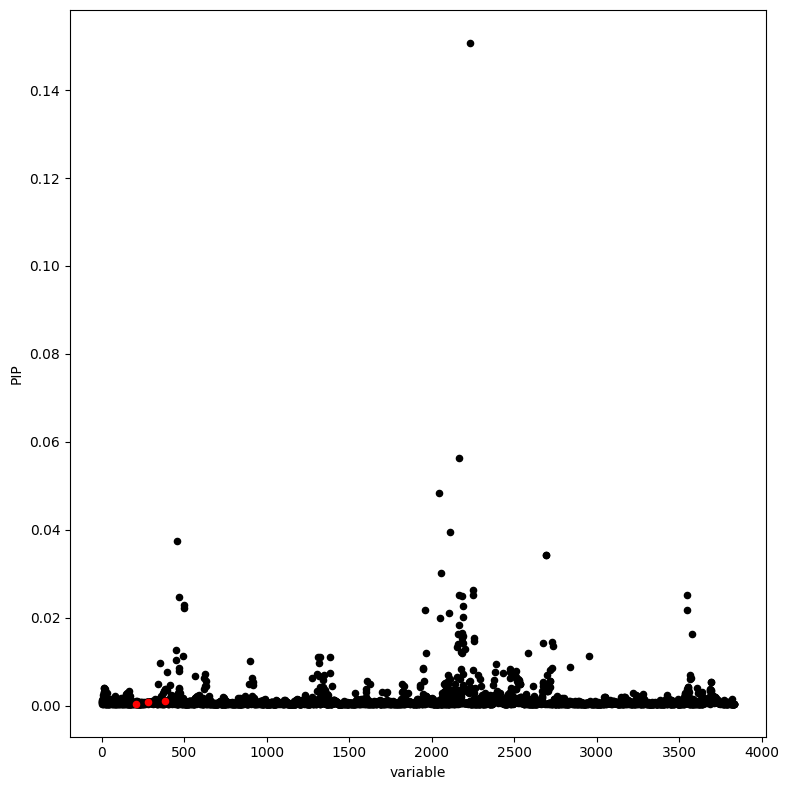

In [4]:
# pop2 small inflated

import pandas as pd
import numpy as np
from susie import susie
from susie_plots import susie_plot

# 设置参数
n2 = 20000
K_true = 3
K = 5
h1_omega = 0.005
h2_omega = 0.005
rho_omega = 0.8
enrich = 50
rho_sigma = 0
nrep = 50
i_loci = 29
pc_var = 0.1
p = 500  # 根据需要设置

# 初始化结果列表
out_susie1 = []
results_dir = f"/home/jwudt/final_project/results/susiepy/small/Ktrue{K_true}/pop2"
os.makedirs(results_dir, exist_ok=True)
# 循环进行nrep次模拟
for i in range(1, nrep+1):
    # 构建X1文件路径
    X2_file_path = f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_X2_ukb_in_sample_ref_n{n2}_chr22_loci{i_loci}.txt"

    # 读取X1文件
    X2 = pd.read_csv(X2_file_path, sep="\t")  # 假设文件是以制表符分隔的

    # 构建y1文件路径
    y2_file_path = (f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_y2_inflate_pc1_{pc_var}_loci_{i_loci}_small_p{p}_"
                     f"chr22_n{n2}_loci{i_loci}__Ktrue{K_true}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                     f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}_{i}.txt")  # 使用当前的i值

    # 读取y1文件
    y2 = pd.read_csv(y2_file_path, sep="\t", header=None)  # 假设文件是以制表符分隔的
    Beta2_file_path = (f"/import/home/share/mingxuan/fine_mapping/simulation/data/simu_loci_{i_loci}_small_p{p}_"
                    f"Beta1_Ktrue{K_true}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                    f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}.txt")
    # 读取Beta1文件
    Beta2 = pd.read_table(Beta2_file_path, sep='\t').values
    X2 = np.array(X2)
    y2 = np.array(y2.iloc[:, 1])
    # 检查数据类型并转换为 float64
    if X2.dtype != np.float64:
        X2 = X2.astype(np.float64)
    # 运行自定义的suise函数
    fitted = susie(X=X2, y=y2, L=K, verbose=True, coverage=0.9, min_abs_corr=0.1)
    fig = susie_plot(fitted, y = "PIP", b=Beta2[:, i-1])
    fig.savefig(f"{results_dir}/rep{i}.png")
    plt.close(fig)
    # 保存结果
    out_susie1.append(fitted)

    print(f"{i}-th rep finished.")

output_file_path = (f"{results_dir}/susie_results_"
                   f"n{n2}_K{K}_Omega{h1_omega}_{h2_omega}_{rho_omega}_"
                   f"enrich{enrich}_rhoSigma{rho_sigma}_nrep{nrep}.pkl")
pd.to_pickle(out_susie1, output_file_path)